### CONSTRUCCION DE LA RED NEURONAL BASADA EN EL DATASET DE *"Risk Factors for Cardiovascular Heart Disease"*

### Parte 1: limpieza y ordenamiento de la base de datos

##### Vamos a trabajar sobre un dataset que evalua distintos tipos factores de riesgo

1. Ordenar de menor a mayor segun edad

2. Verificar si en alguna de mis variables de entrada tengo valores negativos

3. Modificar los valores de la columna edad ya que estan dados en DIAS

4. Ver si hay valores atipicos o no

In [1]:
#Primera parte:
#Limpieza y ordenamiento sobre los datos.
#Vamos a trabajar sobre un dataset que evalua distintos tipos de factores de riesgo.
import numpy as np
import pandas as pd

datos= pd.read_csv("factor-de-riesgo.csv")
datos_back_up=pd.read_csv("factor-de-riesgo.csv")
datos_back_up_respaldo=pd.read_csv("factor-de-riesgo.csv")
#ordenar de menor a mayor segun edad.
#verificar si en alguna de mis variables de entrada tengo valores negativos.
#modificar los valores de la columna edad ya que estan dados en dias.

#Mostramos lo primeros 10 datos del dataset.
print(datos.head(10))

   index  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0   0  18393       2     168    62.0    110     80            1     1   
1      1   1  20228       1     156    85.0    140     90            3     1   
2      2   2  18857       1     165    64.0    130     70            3     1   
3      3   3  17623       2     169    82.0    150    100            1     1   
4      4   4  17474       1     156    56.0    100     60            1     1   
5      5   8  21914       1     151    67.0    120     80            2     2   
6      6   9  22113       1     157    93.0    130     80            3     1   
7      7  12  22584       2     178    95.0    130     90            3     3   
8      8  13  17668       1     158    71.0    110     70            1     1   
9      9  14  19834       1     164    68.0    110     60            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0      

In [2]:
#Primero observamos que nuestro dataset consta de 13 variables de entrada y 1 variable de salida.
#Y en total tenemos 70.000 filas de datos de entrada.
print(datos.shape)

(70000, 14)


In [3]:
#Luego mostramos el nombre de nuestros datos de entrada y el tipo del que son.
print(datos.columns)
print("--------------------------------------------------------------------------------------")
print(datos.dtypes)
#Se observa que tenemos 13 variables del tipo entero y 1 variable del tipo float.

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
--------------------------------------------------------------------------------------
index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [4]:
#Pasamos a mostrar los primeros 10 datos del dataset.
datos.head(10)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
#Para la limpieza de datos lo que primero vamos a hacer es verificar si existen datos faltantes en algunas de las filas, y de ser asi vamos a eliminar estas para un mejor analisis.
datos.info()
#como podemos observar en todas las columnas tenemos datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [6]:
#Pasamos a transformar los datos de la variable 'age' que estan en dias a años dividiendolos por 365.
datos['age'] = datos['age']/365
datos.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
#Como los datos de la variable 'age' estan en punto flotante, vamos a realizar una ultima conversion a tipo int.
datos['age']= datos['age'].astype(int)
datos.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
#Creamos una lista de las columnas para verificar si existen numeros negativos en las variables de entrada.
columnas = ['cardio', 'age', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active','ap_hi','ap_lo','index','id','gender']
for columna in columnas:
    conteo = (datos[columna] < 0).sum()
    print(f"{columna}: {conteo}")
#Como podemos visualizar, en las columnas 'ap_hi' y 'ap_lo', tenemos valores negativos y esto es imposible ya que los valores de las presiones sistolica y diastolica son valores siempre POSITIVOS
#Por eso pasamos a eliminarlos

cardio: 0
age: 0
height: 0
weight: 0
cholesterol: 0
gluc: 0
smoke: 0
alco: 0
active: 0
ap_hi: 7
ap_lo: 1
index: 0
id: 0
gender: 0


In [9]:
#Pasamos a eliminar estas filas que no nos ayudarian en el analisis posterior. Comenzamos con los de la variable 'ap_lo'.
#Y mostramos como va bajando la cantidad de datos usando el comando info().
datos=datos[datos['ap_lo']>=0]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        69999 non-null  int64  
 1   id           69999 non-null  int64  
 2   age          69999 non-null  int32  
 3   gender       69999 non-null  int64  
 4   height       69999 non-null  int64  
 5   weight       69999 non-null  float64
 6   ap_hi        69999 non-null  int64  
 7   ap_lo        69999 non-null  int64  
 8   cholesterol  69999 non-null  int64  
 9   gluc         69999 non-null  int64  
 10  smoke        69999 non-null  int64  
 11  alco         69999 non-null  int64  
 12  active       69999 non-null  int64  
 13  cardio       69999 non-null  int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.7 MB


In [10]:
#Despues pasamos a eliminar los de la variable restante ('ap_hi') y verificamos que ahora tenemos un dataset con 69992 datos.
datos=datos[datos['ap_hi']>=0]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69992 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        69992 non-null  int64  
 1   id           69992 non-null  int64  
 2   age          69992 non-null  int32  
 3   gender       69992 non-null  int64  
 4   height       69992 non-null  int64  
 5   weight       69992 non-null  float64
 6   ap_hi        69992 non-null  int64  
 7   ap_lo        69992 non-null  int64  
 8   cholesterol  69992 non-null  int64  
 9   gluc         69992 non-null  int64  
 10  smoke        69992 non-null  int64  
 11  alco         69992 non-null  int64  
 12  active       69992 non-null  int64  
 13  cardio       69992 non-null  int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.7 MB


In [11]:
#Pasamos a eliminar tambien las columnas que no son de nuestro interes para el estudio, en este caso 'index' y 'id'.
datos= datos.drop(['index','id'], axis=1)
datos.head(8)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
5,60,1,151,67.0,120,80,2,2,0,0,0,0
6,60,1,157,93.0,130,80,3,1,0,0,1,0
7,61,2,178,95.0,130,90,3,3,0,0,1,1


In [12]:
#Ordenamos de menor a mayor segun la variable 'edad'.
datos= datos.sort_values(by='age')
datos.head(20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
30666,29,1,159,59.0,120,80,1,1,0,0,1,0
6219,29,1,175,59.0,120,80,1,1,0,0,1,0
22343,29,2,175,92.0,100,60,1,1,0,0,1,0
55905,30,1,160,59.0,110,70,1,1,0,0,1,0
13757,39,1,152,90.0,160,100,2,2,0,0,1,1
11507,39,2,160,70.0,120,60,1,2,0,0,0,1
66636,39,2,163,87.0,150,100,1,1,0,0,1,1
59042,39,1,172,57.0,110,60,1,1,0,0,1,0
42844,39,1,157,60.0,120,80,1,1,0,0,0,0
1716,39,1,153,50.0,100,60,1,1,0,0,1,0


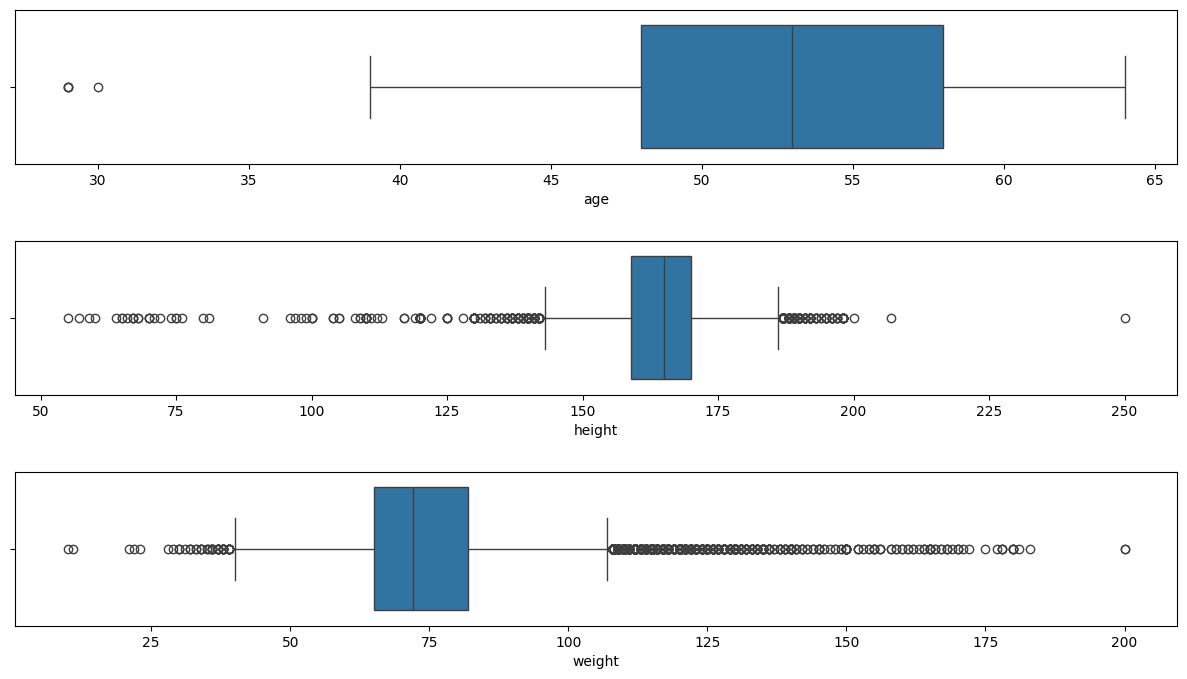

In [13]:
#Ahora lo que analizamos es si existen valores atipicos en ciertas variables que consideramos mas importantes que otras.
#En este caso, vamos a mostrar un diagrama boxplot (o diagrama de caja) en los cuales vamos a poder ver con mayor facilidad estos datos buscados
#Estudiamos estas 3 variables: 'age', 'height' y 'weight'
import seaborn as sns
import matplotlib.pyplot as plt
variables= ['age','height','weight']
fig, ax =plt.subplots(nrows=3,ncols=1, figsize=(15,8))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate (variables):
    sns.boxplot(x=col, data=datos, ax=ax[i])

#OBSERVACIONES:    
#El boxplot de la variable 'age' tenemos 2 outliers o puntos atipicos que vemos que no estan dentro de los datos generales.
#Para el caso de la variable 'height' vemos que el 50% de los datos se encuentran entre 140 y 190 cm aproximadamente
#Y para el tercer boxplot de la variable 'weight' vemos que el 50% de los datos se encuentran entre 40 y 110 kg aproximadamente


In [14]:
#Observamos los datos estadisticos de nuestro dataset.
datos.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69992.00,69992.00,69992.00,69992.00,69992.00,69992.00,69992.00,69992.00,69992.00,69992.00,69992.0,69992.0
mean,52.84,1.35,164.36,74.21,128.84,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,6.77,0.48,8.21,14.40,154.00,188.48,0.68,0.57,0.28,0.23,0.4,0.5
min,29.00,1.00,55.00,10.00,1.00,0.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,48.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,53.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,58.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,64.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


In [15]:
#Lo que decidimos realizar es tomar los valores de altura entre 120 y 200 cm
#Tambien filtramos la variable edad en aquellos que tiene edad mayor o igual a 39 años
#Y por ultimo decidimos quedarnos con los valores de peso mayores a 41kg y menores a 105kg

#Entonces filtramos el dataset en este nuevo rango para nuestro analisis
datos=datos[datos['height']>=120]
datos=datos[datos['height']<=200]
datos=datos[datos['age']>=39]
datos=datos[datos['weight']>=41]
datos=datos[datos['weight']<=105]
datos.shape

(67815, 12)

**HASTA ACA SE LLEGO CON LA LIMPIEZA DE DATOS!**

- Decidimos tomar la altura minima en 1.20m y la maxima en 2m 

- El peso está dentro de los 41kg hasta los 105kg


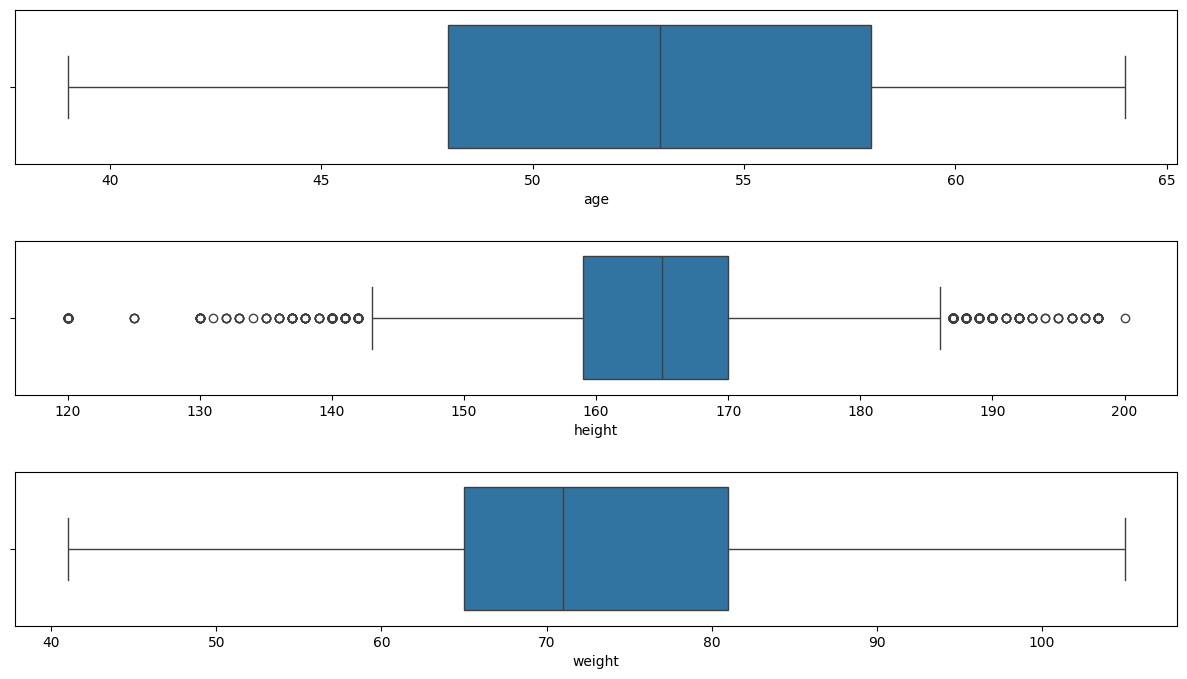

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
variables= ['age','height','weight']
fig, ax =plt.subplots(nrows=3,ncols=1, figsize=(15,8))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate (variables):
    sns.boxplot(x=col, data=datos, ax=ax[i])


In [17]:
datos.describe().round(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000
mean,52.841,1.347,164.309,72.975,128.573,95.945,1.359,1.220,0.087,0.053,0.804,0.494
std,6.763,0.476,7.831,12.262,156.397,188.952,0.674,0.566,0.281,0.223,0.397,0.500
min,39.000,1.000,120.000,41.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,48.000,1.000,159.000,65.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
50%,53.000,1.000,165.000,71.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
75%,58.000,2.000,170.000,81.000,140.000,90.000,1.000,1.000,0.000,0.000,1.000,1.000
max,64.000,2.000,200.000,105.000,16020.000,11000.000,3.000,3.000,1.000,1.000,1.000,1.000


ACA LO QUE REALIZAMOS CON EL DATASET CASI TERMINADO ES EXTRAERLE LA ULTIMA COLUMNA (LA CUAL SERIA LA VARIABLE DE SALIDA) 

PARA PODER ESTANDARIZAR LOS VALORES DE LAS VARIABLES DE ENTRADA Y ANALIZAR LAS CORRELACIONES ENTRE VARIABLES

In [18]:
#Extraemos la ultima columna del dataset para poder normalizarla, y luego despues de esto, volvemos a agregarla.
datos.head()
extraccion_ultima_fila=datos.pop('cardio')

In [19]:
#Procedimiento de normalizacion.
datos_mediciones = datos.describe().T
df_normalizado = (datos - datos_mediciones['mean']) / datos_mediciones['std']
df_normalizado.describe().round(3)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.046,-0.729,-5.658,-2.608,-0.816,-0.508,-0.532,-0.389,-0.308,-0.236,-2.028
25%,-0.716,-0.729,-0.678,-0.650,-0.055,-0.084,-0.532,-0.389,-0.308,-0.236,0.493
50%,0.023,-0.729,0.088,-0.161,-0.055,-0.084,-0.532,-0.389,-0.308,-0.236,0.493
75%,0.763,1.372,0.727,0.655,0.073,-0.031,-0.532,-0.389,-0.308,-0.236,0.493
max,1.650,1.372,4.558,2.612,101.610,57.708,2.436,3.144,3.245,4.244,0.493


In [20]:
#Por ultimo calculamos las correlaciones entre las variables.
df_normalizado.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.021410,-0.084689,0.066377,0.020677,0.018427,0.155214,0.098706,-0.044298,-0.028443,-0.010626
gender,-0.021410,1.000000,0.509721,0.165421,0.005625,0.014701,-0.038512,-0.022187,0.338764,0.169924,0.007040
height,-0.084689,0.509721,1.000000,0.310002,0.004168,0.004152,-0.063927,-0.027755,0.190329,0.092740,-0.006281
weight,0.066377,0.165421,0.310002,1.000000,0.028956,0.038667,0.128044,0.089149,0.063166,0.062763,-0.013438
ap_hi,0.020677,0.005625,0.004168,0.028956,1.000000,0.015079,0.022986,0.010932,-0.001422,0.000930,0.000105
ap_lo,0.018427,0.014701,0.004152,0.038667,0.015079,1.000000,0.022324,0.009208,0.003846,0.011438,0.004057
cholesterol,0.155214,-0.038512,-0.063927,0.128044,0.022986,0.022324,1.000000,0.450270,0.007367,0.033933,0.010916
gluc,0.098706,-0.022187,-0.027755,0.089149,0.010932,0.009208,0.450270,1.000000,-0.008845,0.007218,-0.005504
smoke,-0.044298,0.338764,0.190329,0.063166,-0.001422,0.003846,0.007367,-0.008845,1.000000,0.342304,0.029752
alco,-0.028443,0.169924,0.092740,0.062763,0.000930,0.011438,0.033933,0.007218,0.342304,1.000000,0.028550


##### REALIZAMOS EL MAPA DE CALOR PARA VER CORRELACIONES ENTRE VARIABLES

<Figure size 1000x1000 with 0 Axes>

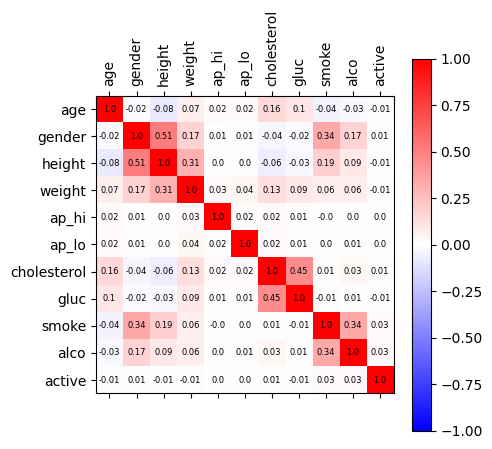

In [21]:
#Realizamos el mapa de calor para las correlaciones.
matriz= df_normalizado.corr()
plt.figure(figsize=(10, 10))
plt.matshow(matriz, cmap="bwr",vmin=-1,vmax=1)
plt.xticks(range(11),df_normalizado.columns, rotation=90)
plt.yticks(range(11),df_normalizado.columns)

for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i,j,round(matriz.iloc[i,j],2),ha="center",va="center",fontsize=6)

plt.colorbar()
plt.show()

Agregamos la columna de salida ('cardio') que habia sido extraida antes para la normalizacion.

In [22]:
#Agregamos la columna de la variable de salida 'cardio' a nuestro dataset ya normalizado.
df_normalizado.head()
df_normalizado['cardio']=extraccion_ultima_fila
df_normalizado.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
13757,-2.046487,-0.728872,-1.571799,1.388494,0.200943,0.021459,0.952065,1.377163,-0.308204,-0.235623,0.492982,1
11507,-2.046487,1.371963,-0.550208,-0.242585,-0.054816,-0.190235,-0.532137,1.377163,-0.308204,-0.235623,-2.028442,1
66636,-2.046487,1.371963,-0.167111,1.143832,0.137004,0.021459,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,1
59042,-2.046487,-0.728872,0.982179,-1.302786,-0.118756,-0.190235,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,0
42844,-2.046487,-0.728872,-0.933305,-1.058124,-0.054816,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,-2.028442,0


In [23]:
#Pasamos nuestro dataset normalizado a una variable nueva para trabajar con el armado de la red.
datos_limpios= df_normalizado
datos_limpios.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
13757,-2.046487,-0.728872,-1.571799,1.388494,0.200943,0.021459,0.952065,1.377163,-0.308204,-0.235623,0.492982,1
11507,-2.046487,1.371963,-0.550208,-0.242585,-0.054816,-0.190235,-0.532137,1.377163,-0.308204,-0.235623,-2.028442,1
66636,-2.046487,1.371963,-0.167111,1.143832,0.137004,0.021459,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,1
59042,-2.046487,-0.728872,0.982179,-1.302786,-0.118756,-0.190235,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,0
42844,-2.046487,-0.728872,-0.933305,-1.058124,-0.054816,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,-2.028442,0


#### Parte 2.1: ARMADO DE LA RED NEURONAL:

**1. UNA SOLA CAPA OCULTA DE 3 NODOS CON LA _FUNCION DE ACTIVACION RELU_**

**2. Y UNA CAPA DE SALIDA CON 1 SOLO NODO CON LA _FUNCION DE ACTIVACION LOGISTICA_**

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

#Definimos las entradas y la salida
entradas= datos_limpios.iloc[:,0:11].values
salidas= datos_limpios.iloc[:,-1].values

#Pasamos a dividir los datos en ENTRENAMIENTO y PRUEBA
X_train, X_test, Y_train, Y_test = train_test_split(entradas, salidas,test_size=1/3)

#registros de entrenamiento
n=X_train.shape[0]
n_train=X_train.shape[0]
print(f"el conjunto de ENTRENAMIENTO es de: {n_train} datos")
n_test=X_test.shape[0]
print(f"el conjutno de PRUEBA es de: {n_test} datos")

np.random.seed(42)

#armamos la red neuronal la cual va a consistir de una capa oculta de 3 nodos 
w_hidden = np.random.rand(3,11)  #* 2 - 1 #ESTO ME DEJABA LOS VALORES RANDOM ENTRE -1 Y 1
w_output= np.random.rand(1,3) #* 2 - 1

b_hidden= np.random.rand(3,1) #* 2 - 1
b_output= np.random.rand(1,1) #* 2 - 1

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

#definimos la funcion para correr la red neuronal
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

#Derivadas de las funciones Relu y Logistica
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

#Ahora pasamos a realizar el backpropagation para ajustar los pesos
#y sesgos para poder reducir la tasa de error
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

el conjunto de ENTRENAMIENTO es de: 45210 datos
el conjutno de PRUEBA es de: 22605 datos


#### Parte 2.1: CALCULO DE PRECISION DE LA RED

In [35]:
#Ahora calculo la precision para TRAIN 
test_predictions = forward_prop(X_train.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy_TRAIN=np.mean(test_predictions==Y_train.reshape(1,-1))
print(f"La precision de la red para TRAIN es de: {accuracy_TRAIN * 100:.2f}%")

La precision de la red para TRAIN es de: 49.29%


In [36]:
#Ahora calculo la precision para TEST
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy_TEST=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"La precision de la red para TEST es de: {accuracy_TEST * 100:.2f}%")

La precision de la red para TEST es de: 49.56%


#### REALIZAMOS EL _BACK-PROPAGATION_ Y EL _DESCENSO DE GRADIENTE_

In [37]:
L = 0.009                #Tasa de aprendizaje

accuracy_train_l= []
accuracy_test_l= []

#Pasamos a realizar el gradiente estocastico para poder entrenar a la red
for i in tqdm(range(90_000)):
    # seleccionar aleatoriamente uno de los datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2
    
    #Calculo la precision de datos test
    test_predictions = forward_prop(X_test.transpose())[3] 
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_test >= 0).astype(int)) #np.array(Y_test >= 0).astype(int)
    accuracy_test = np.mean(test_comparisons==Y_test.reshape(1,-1)) #Para cuando quiera solo mostrarlas c/u sin graph
    accuracy_test_l.append(accuracy_test)
    #print(f"Precision X_test post-entrenamiento: {accuracy_test* 100:.2f}")


    #Calculo la precision de datos train
    test_predictions = forward_prop(X_train.transpose())[3] 
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_train >= 0).astype(int)) #np.array(Y_train >= 0).astype(int)
    accuracy_train = np.mean(test_comparisons==Y_train.reshape(1,-1))    
    accuracy_train_l.append(accuracy_train)
    #print(f"Precision X_train post-entrenamiento: {accuracy_train* 100:.2f}")


100%|██████████| 90000/90000 [07:29<00:00, 200.30it/s]


In [38]:
#Calculo accuracy para conjunto test y entrenamiento
print(f"La tasa de aprendizaje es de: {L} y las iteraciones son {i+1}")

#Calculo la precision de datos test
print(f"Precision X_test post-entrenamiento: {accuracy_test* 100:.2f}%")

#Calculo la precision de datos train  
print(f"Precision X_train post-entrenamiento: {accuracy_train* 100:.2f}%")


La tasa de aprendizaje es de: 0.009 y las iteraciones son 90000
Precision X_test post-entrenamiento: 70.69%
Precision X_train post-entrenamiento: 70.72%


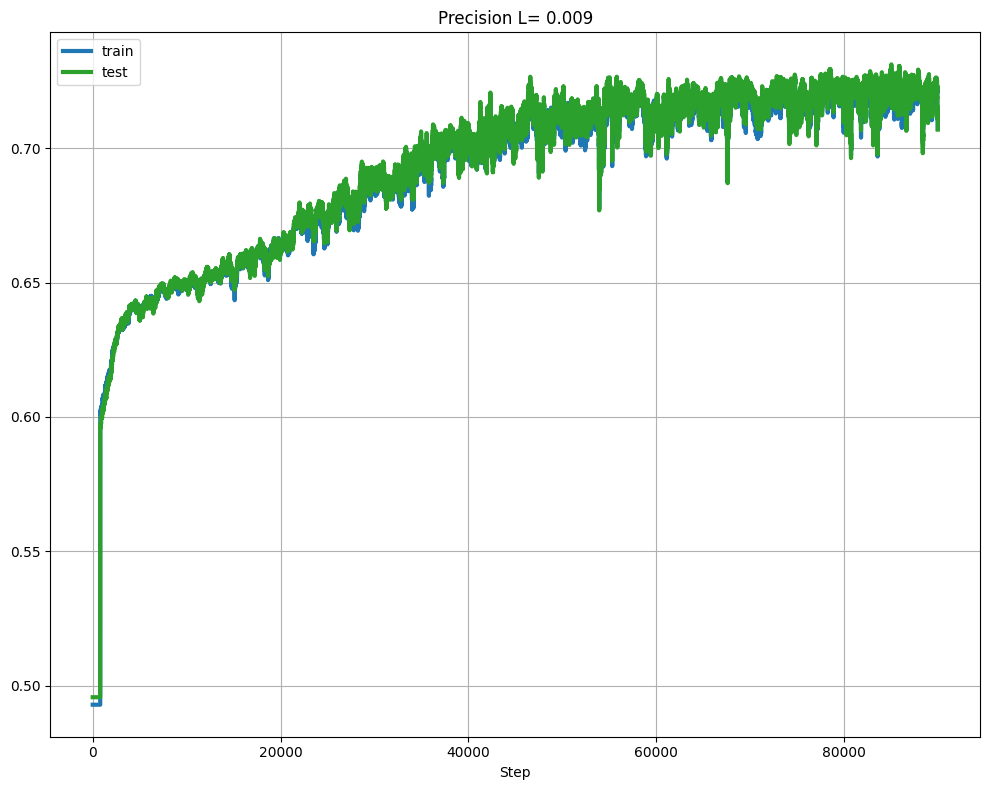

In [39]:
import matplotlib.pyplot as plt

fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw': 3,
}

fmt_test = {
    'color': 'tab:green',
    'ls': 'solid',
    'lw': 3,
}

fig, (ax) = plt.subplots(1,1, figsize=(10, 8))

ax.plot(accuracy_train_l, label='train', **fmt_train)
ax.plot(accuracy_test_l, label='test', **fmt_test)

ax.grid(which='both')
ax.legend()
ax.set_title(f'Precision {L= }')
ax.set_xlabel('Step')

fig.tight_layout()
plt.show()

## Prueba de la red

In [40]:
#El siguiente paso es agarrar muestras del dataset y pasarlas por la red neuronal para observar la prediccion de cada una.
#Y paso a guardar los resultados "prediccion" de cada muestra en una lista.
cantidad_de_muestras = 5
muestras_de_prueba = datos_limpios.sample(cantidad_de_muestras)
muestras_de_prueba.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
44250,0.910567,1.371963,0.726781,1.388494,-0.118756,-0.137311,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,0
47457,0.467009,-0.728872,0.088287,-0.813463,-0.054816,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,0
21341,-0.420107,1.371963,-0.550208,-1.465894,0.137004,-0.137311,-0.532137,-0.389322,-0.308204,-0.235623,-2.028442,1
9480,1.206272,-0.728872,-1.699498,0.083631,0.200943,-0.031464,0.952065,-0.389322,-0.308204,-0.235623,-2.028442,1
44970,-1.011518,-0.728872,-0.422509,0.165185,0.137004,-0.031464,0.952065,1.377163,-0.308204,-0.235623,0.492982,1


In [41]:
#Pasamos a eliminar la ultima columna para poder ingresar los datos a nuestra red armada.
muestras_de_prueba_final= muestras_de_prueba.drop(columns=["cardio"])
muestras_de_prueba_final.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
44250,0.910567,1.371963,0.726781,1.388494,-0.118756,-0.137311,-0.532137,-0.389322,-0.308204,-0.235623,0.492982
47457,0.467009,-0.728872,0.088287,-0.813463,-0.054816,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,0.492982
21341,-0.420107,1.371963,-0.550208,-1.465894,0.137004,-0.137311,-0.532137,-0.389322,-0.308204,-0.235623,-2.028442
9480,1.206272,-0.728872,-1.699498,0.083631,0.200943,-0.031464,0.952065,-0.389322,-0.308204,-0.235623,-2.028442
44970,-1.011518,-0.728872,-0.422509,0.165185,0.137004,-0.031464,0.952065,1.377163,-0.308204,-0.235623,0.492982


#### Probamos datos aleatorios de nuestro dataset para ver la funcionalidad de la Red

In [42]:
for index , muestra in muestras_de_prueba_final.iterrows():
    entrada= muestra.values[:].reshape(1,-1)
    entrada_transpuesta=np.transpose(entrada)

    Z1_nueva,A1_nueva,Z2_nueva,A2_nueva = forward_prop(entrada_transpuesta)

    if (A2_nueva > 0.5):
        prediccion = 1
    elif (A2_nueva<=0.5):
        prediccion = 0

    print(f"prediccion ejemplo {index}: ",prediccion)
    print(f"el valor de la A2 nueva es de:  {A2_nueva}")
    print("-------------------------------------------")

prediccion ejemplo 44250:  0
el valor de la A2 nueva es de:  [[0.46694494]]
-------------------------------------------
prediccion ejemplo 47457:  0
el valor de la A2 nueva es de:  [[0.30887569]]
-------------------------------------------
prediccion ejemplo 21341:  1
el valor de la A2 nueva es de:  [[0.72756257]]
-------------------------------------------
prediccion ejemplo 9480:  1
el valor de la A2 nueva es de:  [[0.95772474]]
-------------------------------------------
prediccion ejemplo 44970:  1
el valor de la A2 nueva es de:  [[0.77072619]]
-------------------------------------------


#### Comparacion de nuestra red armada manualmente, ahora utilizando scikit-learn

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#Utilizamos el dataset ya estandarizado y sin outliers, extraemos los datos de entrada y salida
X = datos_limpios.values[:, :-1]
Y = datos_limpios.values[:, -1]

#Ahora separamos los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3),
                   activation='relu',
                   max_iter=90_000,
                   learning_rate_init=0.009)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print('-----------------------------------------')
print(nn.intercepts_)
print('-----------------------------------------')
print("RESULTADOS FINALES")
print(f'Precision del conjunto de entrenamiento:  {nn.score(X_train, Y_train)* 100:.2f}%')
print(f'Precision del conjunto de prueba:  {nn.score(X_test, Y_test)* 100:.2f}%')
     

[array([[-0.13410492, -0.04380257,  0.29353122],
       [ 0.02399723,  0.01275289,  0.01989856],
       [ 0.01718592, -0.0087973 , -0.06811979],
       [-0.08707215, -0.01878343, -0.08406019],
       [-3.95313966, -0.1357949 , -0.07542108],
       [ 0.06540708,  0.16043962, -0.02190656],
       [-0.17072672,  0.13491672, -0.56946758],
       [-0.02123102, -0.23572377,  0.2855861 ],
       [ 0.02946669,  0.09414893, -0.73194656],
       [ 0.02828528,  0.05734209, -0.69278786],
       [ 0.03138665,  0.05993762, -0.04941023]]), array([[-2.51878177],
       [ 0.69937402],
       [ 0.43755262]])]
-----------------------------------------
[array([ 0.67067114,  1.64677699, -0.06726618]), array([0.57058852])]
-----------------------------------------
RESULTADOS FINALES
Precision del conjunto de entrenamiento:  72.86%
Precision del conjunto de prueba:  72.69%


### Parte 3: Generalización y Comparación
• Realizar pruebas variando la arquitectura de la red y las funciones de activación.

• Comparar los resultados obtenidos para determinar la configuración más eficiente.

### Prueba N°1

Red con :

*2 capas ocultas de 6 y 4 nodos, ambas con funciones de activacion ReLu*

*1 capa de salida con funcion de activacion Logistica*



In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Utilizamos el dataset ya estandarizado y sin outliers, extraemos los datos de entrada y salida
X = datos.values[:, :-1]
Y = datos.values[:, -1]

#Ahora separamos los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3,random_state=42)

#normalizamos los datos
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

nn = MLPClassifier(solver='sgd',                #sirve para setear el algoritmo que se utiliza para optimizar pesos y sesgos
                   hidden_layer_sizes=(6,4),    #indica la cantidad de capas y cuantas neuronas lleva cada una
                   activation='relu',           #aca se setea la funcion de activacion de las capas
                   max_iter=90_000,             #indica la cantidad de iteraciones de la red
                   learning_rate_init=0.009,    #sirve para setear la tasa de aprendizaje, el'L'
                   random_state=42)             #aca se setea la semilla para obtener siempre los mismo valores aleatorios

#seteamos la salida de activacion de la red, a Logistica
nn.out_activation_ = 'logistic'

#Entrenamos al modelo con los datos de entrenamiento
nn.fit(X_train, Y_train)

#Predecir las etiquetas para los datos de entrenamiento y prueba
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

#Calcular la precisión de los datos de entrenamiento y prueba
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

#Imprimir la precision
print(f'Precisión en los datos de entrenamiento: {train_accuracy*100:.2f}%')
print(f'Precisión en los datos de prueba: {test_accuracy*100:.2f}%')
     

Precisión en los datos de entrenamiento: 80.41%
Precisión en los datos de prueba: 80.52%


Prueba N°2

Red con :

*3 capas ocultas de 8, 6 y 4 nodos, todas con funciones de activacion ReLu*

*1 capa de salida con funcion de activacion Logistica*



In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Utilizamos el dataset ya estandarizado y sin outliers, extraemos los datos de entrada y salida
X = datos.values[:, :-1]
Y = datos.values[:, -1]

#Ahora separamos los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3,random_state=42)

#normalizamos los datos
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

nn = MLPClassifier(solver='sgd',                #sirve para setear el algoritmo que se utiliza para optimizar pesos y sesgos
                   hidden_layer_sizes=(8,6,4),  #indica la cantidad de capas y cuantas neuronas lleva cada una
                   activation='relu',           #aca se setea la funcion de activacion de las capas
                   max_iter=90_000,             #indica la cantidad de iteraciones de la red
                   learning_rate_init=0.009,    #sirve para setear la tasa de aprendizaje, el'L'
                   random_state=42)             #aca se setea la semilla para obtener siempre los mismo valores aleatorios

#seteamos la salida de activacion de la red, a Logistica
nn.out_activation_ = 'logistic'

#Entrenamos al modelo con los datos de entrenamiento
nn.fit(X_train, Y_train)

#Predecir las etiquetas para los datos de entrenamiento y prueba
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

#Calcular la precisión de los datos de entrenamiento y prueba
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

#Imprimir la precision
print(f'Precisión en los datos de entrenamiento: {train_accuracy*100:.2f}%')
print(f'Precisión en los datos de prueba: {test_accuracy*100:.2f}%')
     

Precisión en los datos de entrenamiento: 80.41%
Precisión en los datos de prueba: 80.52%


Prueba N°3

Red con :

*3 capas ocultas de 8, 6 y 4 nodos, todas con funciones de activacion ReLu*

*1 capa de salida con funcion de activacion Logistica*

*Utilizando el algoritmo Adam*


In [46]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Utilizamos el dataset ya estandarizado y sin outliers, extraemos los datos de entrada y salida
X = datos.values[:, :-1]
Y = datos.values[:, -1]

#Ahora separamos los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3,random_state=42)

#normalizamos los datos
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

nn = MLPClassifier(solver='adam',                #sirve para setear el algoritmo que se utiliza para optimizar pesos y sesgos
                   hidden_layer_sizes=(8,6,4),  #indica la cantidad de capas y cuantas neuronas lleva cada una
                   activation='relu',           #aca se setea la funcion de activacion de las capas
                   max_iter=90_000,             #indica la cantidad de iteraciones de la red
                   learning_rate_init=0.009,    #sirve para setear la tasa de aprendizaje, el'L'
                   random_state=42)             #aca se setea la semilla para obtener siempre los mismo valores aleatorios

#seteamos la salida de activacion de la red, a Logistica
nn.out_activation_ = 'logistic'

#Entrenamos al modelo con los datos de entrenamiento
nn.fit(X_train, Y_train)

#Predecir las etiquetas para los datos de entrenamiento y prueba
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

#Calcular la precisión de los datos de entrenamiento y prueba
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

#Imprimir la precision
print(f'Precisión en los datos de entrenamiento: {train_accuracy*100:.2f}%')
print(f'Precisión en los datos de prueba: {test_accuracy*100:.2f}%')
     

Precisión en los datos de entrenamiento: 80.41%
Precisión en los datos de prueba: 80.52%


Prueba N°4

Red con :

*3 capas ocultas de 8, 6 y 4 nodos, todas con funciones de activacion Tangente Hiperbolica*

*1 capa de salida con funcion de activacion Logistica*

*Utilizando el algoritmo Adam*


In [98]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Utilizamos el dataset ya estandarizado y sin outliers, extraemos los datos de entrada y salida
X = datos.values[:, :-1]
Y = datos.values[:, -1]

#Ahora separamos los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3,random_state=42)

#normalizamos los datos
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

nn = MLPClassifier(solver='adam',                #sirve para setear el algoritmo que se utiliza para optimizar pesos y sesgos
                   hidden_layer_sizes=(8,6,4),  #indica la cantidad de capas y cuantas neuronas lleva cada una
                   activation='tanh',           #aca se setea la funcion de activacion de las capas
                   max_iter=90_000,             #indica la cantidad de iteraciones de la red
                   learning_rate_init=0.009,    #sirve para setear la tasa de aprendizaje, el'L'
                   random_state=42)             #aca se setea la semilla para obtener siempre los mismo valores aleatorios

#seteamos la salida de activacion de la red, a Logistica
nn.out_activation_ = 'logistic'

#Entrenamos al modelo con los datos de entrenamiento
nn.fit(X_train, Y_train)

#Predecir las etiquetas para los datos de entrenamiento y prueba
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

#Calcular la precisión de los datos de entrenamiento y prueba
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

#Imprimir la precision
print(f'Precisión en los datos de entrenamiento: {train_accuracy*100:.2f}%')
print(f'Precisión en los datos de prueba: {test_accuracy*100:.2f}%')
     

Precisión en los datos de entrenamiento: 80.43%
Precisión en los datos de prueba: 80.35%
